<a href="https://colab.research.google.com/github/ChanyutJean/2143488-Big-Data-AI-HW/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files  
uploaded = files.upload()

Saving HW2_Housing Survey.csv to HW2_Housing Survey (1).csv


In [9]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['HW2_Housing Survey.csv']))

In [10]:
df.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJUST,WGTP,NP,TYPE,ACR,AGS,BDS,BLD,BUS,CONP,ELEP,FS,FULP,GASP,HFL,INSP,KIT,MHP,MRGI,MRGP,MRGT,MRGX,PLM,RMS,RNTM,RNTP,SMP,TEL,TEN,VACS,VAL,VEH,WATP,YBL,...,wgtp41,wgtp42,wgtp43,wgtp44,wgtp45,wgtp46,wgtp47,wgtp48,wgtp49,wgtp50,wgtp51,wgtp52,wgtp53,wgtp54,wgtp55,wgtp56,wgtp57,wgtp58,wgtp59,wgtp60,wgtp61,wgtp62,wgtp63,wgtp64,wgtp65,wgtp66,wgtp67,wgtp68,wgtp69,wgtp70,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
0,H,186,8,700,4,16,1015675,89,4,1,1.0,NaN,4.0,2.0,2.0,NaN,180.0,0.0,2.0,3.0,3.0,600.0,1.0,NaN,1.0,1300.0,1.0,1.0,1.0,9.0,NaN,NaN,NaN,1.0,1.0,NaN,17.0,3.0,840.0,5.0,...,90,171,27,83,153,148,92,91,91,93,90,26,94,142,24,91,29,84,148,30,93,143,24,88,147,145,91,83,83,86,81,27,93,151,28,79,25,101,157,129
1,H,306,8,700,4,16,1015675,310,1,1,NaN,NaN,1.0,7.0,NaN,NaN,60.0,0.0,2.0,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,600.0,NaN,1.0,3.0,NaN,NaN,1.0,1.0,3.0,...,107,253,321,289,96,343,564,274,118,118,321,261,130,463,294,479,391,307,476,283,116,353,323,374,106,236,380,313,90,94,292,401,81,494,346,496,615,286,454,260
2,H,395,8,100,4,16,1015675,106,2,1,1.0,NaN,3.0,2.0,2.0,NaN,70.0,0.0,2.0,30.0,1.0,200.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,7.0,NaN,NaN,NaN,1.0,2.0,NaN,18.0,2.0,50.0,5.0,...,173,36,168,175,99,103,30,35,155,102,95,107,185,120,114,113,36,115,103,29,183,35,179,169,95,110,28,34,233,97,123,119,168,107,95,101,30,124,106,31
3,H,506,8,700,4,16,1015675,240,4,1,1.0,NaN,4.0,2.0,2.0,NaN,40.0,0.0,2.0,80.0,1.0,200.0,1.0,NaN,1.0,860.0,1.0,1.0,1.0,6.0,NaN,NaN,400.0,1.0,1.0,NaN,19.0,3.0,500.0,2.0,...,239,65,259,247,230,225,82,220,233,419,390,69,74,391,276,70,422,409,223,245,269,488,221,250,247,240,415,234,219,66,68,359,385,71,234,421,76,77,242,231
4,H,835,8,800,4,16,1015675,118,4,1,2.0,1.0,5.0,2.0,2.0,NaN,250.0,0.0,2.0,3.0,3.0,700.0,1.0,NaN,1.0,1900.0,1.0,1.0,1.0,7.0,NaN,NaN,650.0,1.0,1.0,NaN,20.0,5.0,2.0,3.0,...,116,36,135,237,33,33,249,102,84,224,119,250,119,125,126,32,112,33,131,45,101,165,125,41,191,195,49,119,92,44,127,36,119,121,116,209,97,176,144,38


In [17]:
df[df['VAL'] == 24]['VAL'].count()

53

In [38]:
df[df['NP'] > 0]['NP'].mean()


2.4984939759036147

In [138]:
map = [-1, 5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 45, 55, 65, 75, 85, 95, 100, \
       125, 150, 175, 200, 250, 300, 400, 500, 750, 1000]
def real_value(x):
  return (map[int(x)])

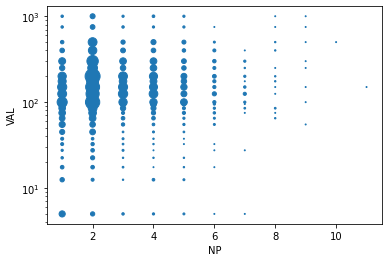

In [140]:
filled_df = df[df['NP'] > 0][['NP', 'VAL']].dropna()
clean_df = filled_df.groupby(['NP', 'VAL']).size().reset_index().rename(columns={0:'NUM'})
clean_df['VAL'] = clean_df['VAL'].apply(real_value)
clean_df.plot.scatter('NP', 'VAL', s='NUM', logy=True)

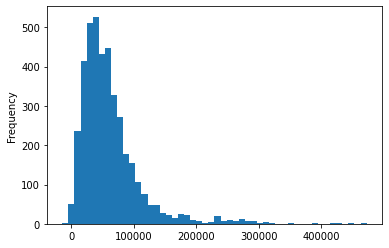

In [103]:
df['FINCP'].plot.hist(bins=50)

(array([  1.,  50., 236., 415., 510., 527., 431., 448., 328., 273., 177.,
        155., 106.,  76.,  49.,  49.,  28.,  22.,  16.,  24.,  22.,   9.,
          8.,   3.,   5.,  21.,   6.,   9.,   7.,  13.,   6.,   6.,   3.,
          4.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   2.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

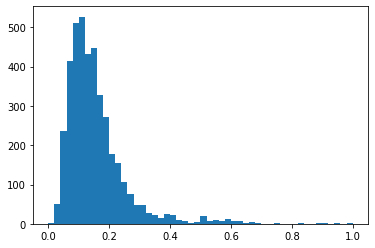

In [109]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0,1))
array = scaler.fit_transform(df['FINCP'].values.reshape(-1, 1))
plt.hist(array, bins=50)

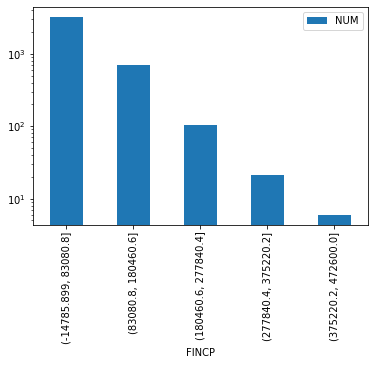

In [192]:
from matplotlib import pyplot as plt
positive_df = pd.cut(df['FINCP'], 5).reset_index()
aggregate_df = positive_df.groupby('FINCP').size().reset_index().rename(columns={0:'NUM'})
aggregate_df.plot.bar(x='FINCP', y='NUM', logy=True)